In [ ]:
import json
from bs4 import BeautifulSoup
from urllib.request import urlopen

import pandas as pd
from copy import deepcopy

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.patches import Arc


In [ ]:
## Robert_lewandowski=227
## Sadio_Mane=838

scrape_url="https://understat.com/player/838"
page_connect=urlopen(scrape_url)
page_html=BeautifulSoup(page_connect,"html.parser")

In [ ]:
page_html.findAll(name="script")[3].text

"\n\tvar shotsData \t= JSON.parse('\\x5B\\x7B\\x22id\\x22\\x3A\\x2215835\\x22,\\x22minute\\x22\\x3A\\x2233\\x22,\\x22result\\x22\\x3A\\x22SavedShot\\x22,\\x22X\\x22\\x3A\\x220.7930000305175782\\x22,\\x22Y\\x22\\x3A\\x220.38799999237060545\\x22,\\x22xG\\x22\\x3A\\x220.03144051134586334\\x22,\\x22player\\x22\\x3A\\x22Sadio\\x20Man\\x5Cu00e9\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x22838\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222014\\x22,\\x22shotType\\x22\\x3A\\x22LeftFoot\\x22,\\x22match_id\\x22\\x3A\\x224741\\x22,\\x22h_team\\x22\\x3A\\x22Southampton\\x22,\\x22a_team\\x22\\x3A\\x22Queens\\x20Park\\x20Rangers\\x22,\\x22h_goals\\x22\\x3A\\x222\\x22,\\x22a_goals\\x22\\x3A\\x221\\x22,\\x22date\\x22\\x3A\\x222014\\x2D09\\x2D27\\x2015\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3Anull,\\x22lastAction\\x22\\x3A\\x22None\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x2215841\\x22,\\x22minute\\x22\\x3A\\x2252\\x22,\\x22result\\x22\\x3A\\x22SavedShot\

In [ ]:
json_raw_string = page_html.findAll(name="script")[3].text

In [ ]:
start_ind=json_raw_string.index("\\")
end_ind = json_raw_string.index("')")


In [ ]:
json_data=json_raw_string[start_ind:end_ind]
json_data

'\\x5B\\x7B\\x22id\\x22\\x3A\\x2215835\\x22,\\x22minute\\x22\\x3A\\x2233\\x22,\\x22result\\x22\\x3A\\x22SavedShot\\x22,\\x22X\\x22\\x3A\\x220.7930000305175782\\x22,\\x22Y\\x22\\x3A\\x220.38799999237060545\\x22,\\x22xG\\x22\\x3A\\x220.03144051134586334\\x22,\\x22player\\x22\\x3A\\x22Sadio\\x20Man\\x5Cu00e9\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x22838\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222014\\x22,\\x22shotType\\x22\\x3A\\x22LeftFoot\\x22,\\x22match_id\\x22\\x3A\\x224741\\x22,\\x22h_team\\x22\\x3A\\x22Southampton\\x22,\\x22a_team\\x22\\x3A\\x22Queens\\x20Park\\x20Rangers\\x22,\\x22h_goals\\x22\\x3A\\x222\\x22,\\x22a_goals\\x22\\x3A\\x221\\x22,\\x22date\\x22\\x3A\\x222014\\x2D09\\x2D27\\x2015\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3Anull,\\x22lastAction\\x22\\x3A\\x22None\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x2215841\\x22,\\x22minute\\x22\\x3A\\x2252\\x22,\\x22result\\x22\\x3A\\x22SavedShot\\x22,\\x22X\\x22\\x3A\\x220.815999

In [ ]:
json_data=json_data.encode("utf8").decode("unicode_escape")

In [ ]:
shots_df=pd.json_normalize(json.loads(json_data))

In [ ]:
shots_df.columns

Index(['id', 'minute', 'result', 'X', 'Y', 'xG', 'player', 'h_a', 'player_id',
       'situation', 'season', 'shotType', 'match_id', 'h_team', 'a_team',
       'h_goals', 'a_goals', 'date', 'player_assisted', 'lastAction'],
      dtype='object')

In [ ]:
shots_df.head(5)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,15835,33,SavedShot,0.7930000305175782,0.38799999237060545,0.03144051134586334,Sadio Mané,h,838,OpenPlay,2014,LeftFoot,4741,Southampton,Queens Park Rangers,2,1,2014-09-27 15:00:00,None,None
1,15841,52,SavedShot,0.8159999847412109,0.69,0.0295916348695755,Sadio Mané,h,838,OpenPlay,2014,RightFoot,4741,Southampton,Queens Park Rangers,2,1,2014-09-27 15:00:00,Morgan Schneiderlin,Pass
2,15845,56,BlockedShot,0.9359999847412109,0.39799999237060546,0.045642297714948654,Sadio Mané,h,838,FromCorner,2014,Head,4741,Southampton,Queens Park Rangers,2,1,2014-09-27 15:00:00,Steven Davis,Cross
3,17618,8,BlockedShot,0.9430000305175781,0.6,0.31141433119773865,Sadio Mané,a,838,OpenPlay,2014,RightFoot,4696,Tottenham,Southampton,1,0,2014-10-05 14:05:00,Graziano Pellè,Cross
4,17627,53,BlockedShot,0.7169999694824218,0.46299999237060546,0.04444437101483345,Sadio Mané,a,838,DirectFreekick,2014,RightFoot,4696,Tottenham,Southampton,1,0,2014-10-05 14:05:00,None,Standard


In [ ]:
shots_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               629 non-null    object
 1   minute           629 non-null    object
 2   result           629 non-null    object
 3   X                629 non-null    object
 4   Y                629 non-null    object
 5   xG               629 non-null    object
 6   player           629 non-null    object
 7   h_a              629 non-null    object
 8   player_id        629 non-null    object
 9   situation        629 non-null    object
 10  season           629 non-null    object
 11  shotType         629 non-null    object
 12  match_id         629 non-null    object
 13  h_team           629 non-null    object
 14  a_team           629 non-null    object
 15  h_goals          629 non-null    object
 16  a_goals          629 non-null    object
 17  date             629 non-null    ob

In [ ]:
shots_df= shots_df.apply(pd.to_numeric,errors="ignore")
shots_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               629 non-null    int64  
 1   minute           629 non-null    int64  
 2   result           629 non-null    object 
 3   X                629 non-null    float64
 4   Y                629 non-null    float64
 5   xG               629 non-null    float64
 6   player           629 non-null    object 
 7   h_a              629 non-null    object 
 8   player_id        629 non-null    int64  
 9   situation        629 non-null    object 
 10  season           629 non-null    int64  
 11  shotType         629 non-null    object 
 12  match_id         629 non-null    int64  
 13  h_team           629 non-null    object 
 14  a_team           629 non-null    object 
 15  h_goals          629 non-null    int64  
 16  a_goals          629 non-null    int64  
 17  date            

(0.5691172539231321,
 1.0548827613356568,
 0.07260561756931048,
 0.909394390060084)

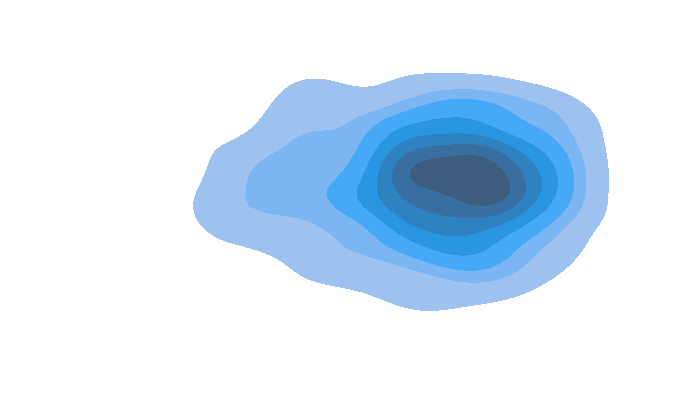

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(x=shots_df["X"],y=shots_df["Y"],shade=True,n_levels=8)
plt.axis("off")

In [ ]:
## Setting dimensions of football field
x_lims=[0,1.15]
y_lims=[0, 0.75]

x_mid=x_lims[1]/2
y_mid=y_lims[1]/2

## Setting color
bg_color="green"
ln_color="white"
ln_width= 2.00


In [ ]:
shots_df["result"].value_counts()

MissedShots    212
BlockedShot    151
SavedShot      143
Goal           111
ShotOnPost      12
Name: result, dtype: int64

In [ ]:
goals_df = shots_df[shots_df["result"]=="Goal"]

In [ ]:
goals_df["X"]=goals_df["X"].multiply(x_lims[1])
goals_df["Y"]=goals_df["Y"].multiply(y_lims[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from numpy.lib.function_base import angle
def create_full_pitch(x_lims,y_lims,bg_color="green",ln_color="white",ln_width=2.00):

  ## creating figure
  fig=plt.figure(facecolor=bg_color,figsize=(16,10))
  ax= fig.add_subplot(111,facecolor=bg_color)

  ##Pitch outline & Center Line
  plt.plot([x_lims[0],x_lims[0]], [y_lims[0],y_lims[1]],linewidth=ln_width,color=ln_color) ## Left end
  plt.plot([x_lims[0],x_lims[1]], [y_lims[1],y_lims[1]],linewidth=ln_width,color=ln_color) ## upper end
  plt.plot([x_lims[1],x_lims[1]], [y_lims[1],y_lims[0]],linewidth=ln_width,color=ln_color) ## right end
  plt.plot([x_lims[1],x_lims[0]], [y_lims[0],y_lims[0]],linewidth=ln_width,color=ln_color) ## lower end
  plt.plot([x_mid,x_mid],[y_lims[0],y_lims[1]],linewidth=ln_width,color=ln_color)          ## center line

  # Left penalty Area
  plt.plot([x_lims[0]+0.18,x_lims[0]+0.18],[y_mid-0.22,y_mid+0.22],color=ln_color)
  plt.plot([x_lims[0],x_lims[0]+0.18],[y_mid+0.22,y_mid+0.22],color=ln_color)
  plt.plot([x_lims[0],x_lims[0]+0.18],[y_mid-0.22,y_mid-0.22],color=ln_color)

  # Right Penaly Area
  plt.plot([x_lims[1]-0.18,x_lims[1]-0.18],[y_mid-0.22,y_mid+0.22],color=ln_color)
  plt.plot([x_lims[1],x_lims[1]-0.18],[y_mid+0.22,y_mid+0.22],color=ln_color)
  plt.plot([x_lims[1],x_lims[1]-0.18],[y_mid-0.22,y_mid-0.22],color=ln_color)

  ## Left 6 yrd box
  plt.plot([x_lims[0]+0.06,x_lims[0]+0.06],[y_mid-0.06,y_mid+0.06],color=ln_color)
  plt.plot([x_lims[0],x_lims[0]+0.06],[y_mid+0.06,y_mid+0.06],color=ln_color)
  plt.plot([x_lims[0],x_lims[0]+0.06],[y_mid-0.06,y_mid-0.06],color=ln_color)

  ## Right 6 Yrd box
  plt.plot([x_lims[1]-0.06,x_lims[1]-0.06],[y_mid-0.06,y_mid+0.06],color=ln_color)
  plt.plot([x_lims[1],x_lims[1]-0.06],[y_mid+0.06,y_mid+0.06],color=ln_color)
  plt.plot([x_lims[1],x_lims[1]-0.06],[y_mid-0.06,y_mid-0.06],color=ln_color)

  ## Preparing Circles
  center_circle=plt.Circle((x_mid,y_mid),.1,color=ln_color,fill=False)
  center_spot=plt.Circle((x_mid,y_mid),.005,color=ln_color)
  left_pen_spot=plt.Circle((x_lims[0]+0.12,y_mid),.005,color=ln_color)
  right_pen_spot=plt.Circle((x_lims[1]-0.12,y_mid),.005,color=ln_color)

  ##Draw Circles
  ax.add_patch(center_circle)
  ax.add_patch(center_spot)
  ax.add_patch(left_pen_spot)
  ax.add_patch(right_pen_spot)

  ## Preparing arcs
  left_arc=Arc((x_lims[0]+0.12,y_mid),height=0.183,width=0.183,angle=0,theta1=310,theta2=50,color=ln_color)
  right_arc=Arc((x_lims[1]-0.12,y_mid),height=0.183,width=0.183,angle=0,theta1=130,theta2=230,color=ln_color)

  ## Draw Arcs
  ax.add_patch(left_arc)
  ax.add_patch(right_arc)

  plt.axis("off")

(0.0, 0.75)

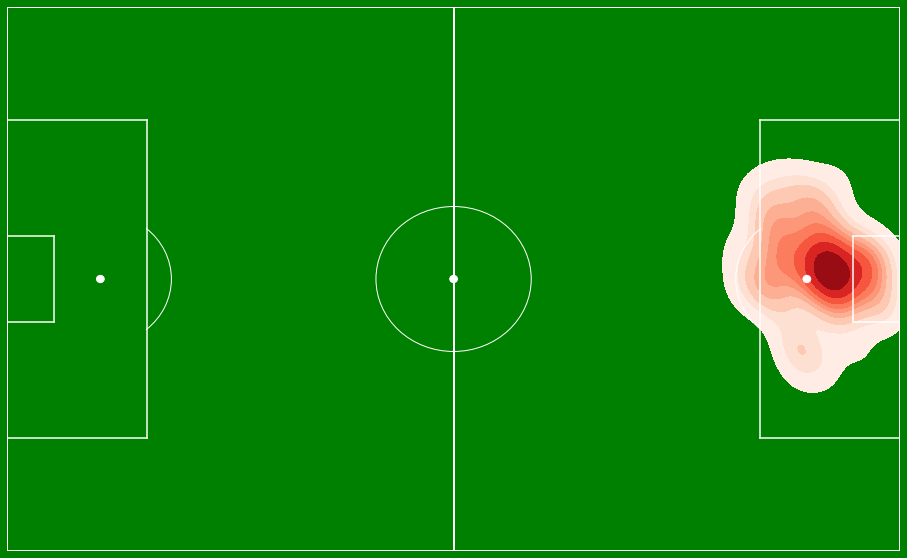

In [ ]:
create_full_pitch(x_lims,y_lims)

ax=sns.kdeplot(x=goals_df["X"],y=goals_df["Y"],fill=True, n_levels= 10,cmap="Reds")

plt.xlim(x_lims)
plt.ylim(y_lims)